In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv("Indian automoble buying behavour study 1.0.csv")

In [3]:
data.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


In [4]:
data.shape

(99, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   House Loan        99 non-null     object
 7   Wife Working      99 non-null     object
 8   Salary            99 non-null     int64 
 9   Wife Salary       99 non-null     int64 
 10  Total Salary      99 non-null     int64 
 11  Make              99 non-null     object
 12  Price             99 non-null     int64 
dtypes: int64(6), object(7)
memory usage: 10.2+ KB


In [6]:
data.describe()

,Age,No of Dependents,Salary,Wife Salary,Total Salary,Price
count,99.000000,99.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
mean,36.313131,2.181818,1.736364e+06,5.343434e+05,2.270707e+06,1.194040e+06
std,6.246054,1.335265,6.736217e+05,6.054450e+05,1.050777e+06,4.376955e+05
min,26.000000,0.000000,2.000000e+05,0.000000e+00,2.000000e+05,1.100000e+05
25%,31.000000,2.000000,1.300000e+06,0.000000e+00,1.550000e+06,8.000000e+05
50%,36.000000,2.000000,1.600000e+06,5.000000e+05,2.100000e+06,1.200000e+06
75%,41.000000,3.000000,2.200000e+06,9.000000e+05,2.700000e+06,1.500000e+06
max,51.000000,4.000000,3.800000e+06,2.100000e+06,5.200000e+06,3.000000e+06


In [7]:
data.isnull().sum()

Age                 0
Profession          0
Marrital Status     0
Education           0
No of Dependents    0
Personal loan       0
House Loan          0
Wife Working        0
Salary              0
Wife Salary         0
Total Salary        0
Make                0
Price               0
dtype: int64

In [8]:
#There are no null values in the dataset

In [9]:
data.dtypes

Age                  int64
Profession          object
Marrital Status     object
Education           object
No of Dependents     int64
Personal loan       object
House Loan          object
Wife Working        object
Salary               int64
Wife Salary          int64
Total Salary         int64
Make                object
Price                int64
dtype: object

In [10]:
data.rename(columns={"Marrital Status": "Marital Status"}, inplace=True)

In [11]:
data.columns

Index(['Age', 'Profession', 'Marital Status', 'Education', 'No of Dependents',
       'Personal loan', 'House Loan', 'Wife Working', 'Salary', 'Wife Salary',
       'Total Salary', 'Make', 'Price'],
      dtype='object')

In [12]:
#There was a spelling mistake in the column marital status, hence it is renamed

In [13]:
data.rename(columns={'Personal loan':'Car_Loan'}, inplace=True)
data.rename(columns={'Price':'Car_Price'}, inplace=True)

In [14]:
data.head()

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Car_Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000


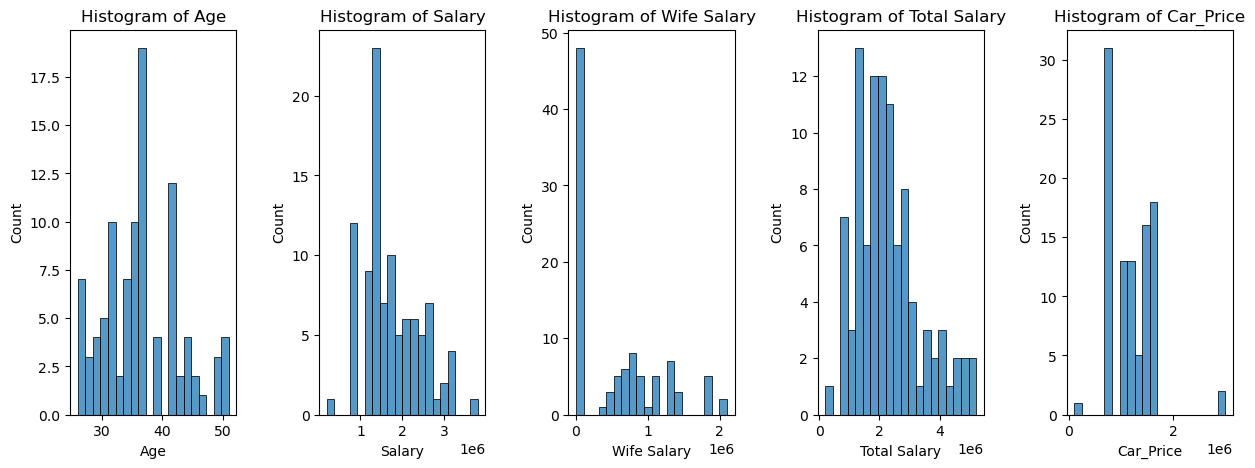

In [15]:
plt.figure(1, figsize=(15, 5))
n = 0
for x in ["Age", "Salary", "Wife Salary", "Total Salary", "Car_Price"]:
    n += 1
    plt.subplot(1, 5, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.histplot(data[x], bins=20)
    plt.title("Histogram of {}".format(x))
plt.show()

In [16]:
profession = data['Profession'].value_counts()
profession

Profession
Salaried    64
Business    35
Name: count, dtype: int64

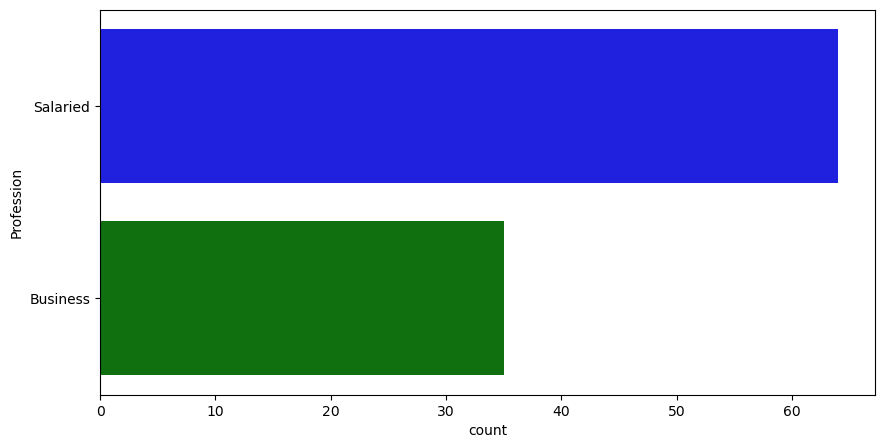

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Profession", data=data, palette={'Salaried' : 'blue', 'Business': 'green'})
plt.show()

In [18]:
#There are 64 salaried people and 35 business people-there are approximately 2 salaried people for every 1 business person.

In [19]:
marital_status = data['Marital Status'].value_counts()
marital_status

Marital Status
Married    84
Single     15
Name: count, dtype: int64

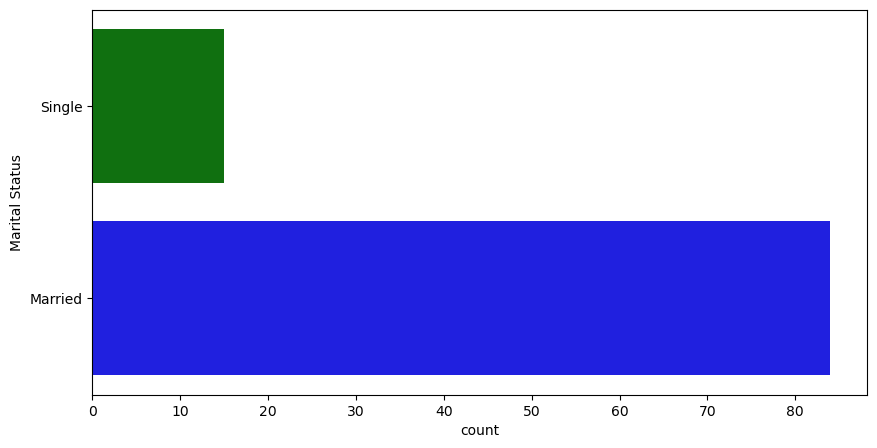

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Marital Status", data=data, palette={'Married': 'blue', 'Single': 'green'})
plt.show()

In [21]:
#The number of married people are way more than the unmarried

In [22]:
education = data['Education'].value_counts()
education

Education
Post Graduate    56
Graduate         43
Name: count, dtype: int64

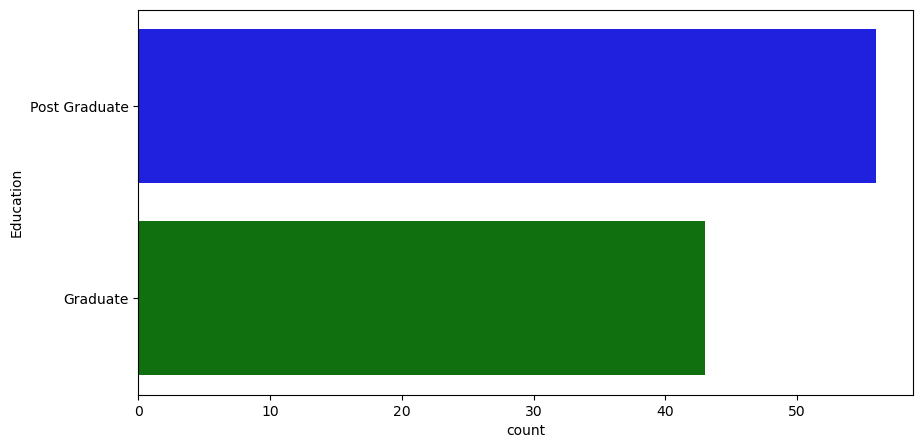

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Education", data=data, palette={'Post Graduate': 'blue', 'Graduate': 'green'})
plt.show()

In [24]:
loan_car = data["Car_Loan"].value_counts()
loan_car

Car_Loan
No     67
Yes    32
Name: count, dtype: int64

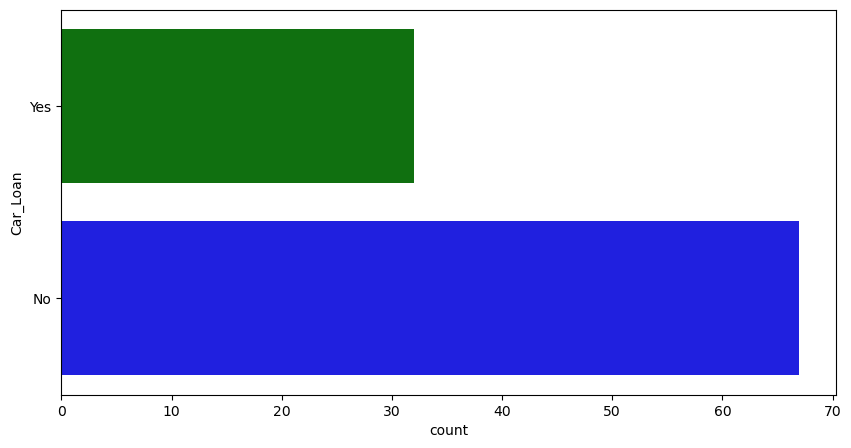

In [25]:
plt.figure(figsize=(10, 5))
sns.countplot(y="Car_Loan", data=data, palette={'Yes': 'green', 'No': 'blue'})
plt.show()

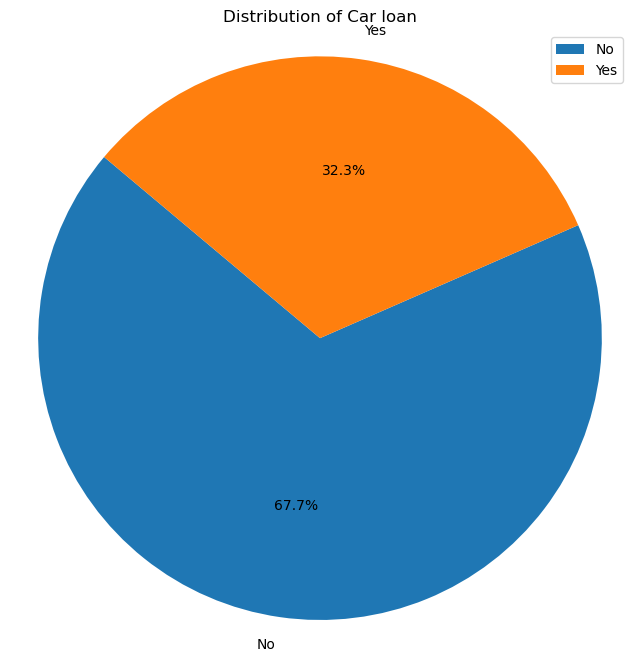

In [26]:
personal_loan_count = data['Car_Loan'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(personal_loan_count, labels=personal_loan_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Car loan')
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

In [27]:
loan_house= data["House Loan"].value_counts()
loan_house

House Loan
No     62
Yes    37
Name: count, dtype: int64

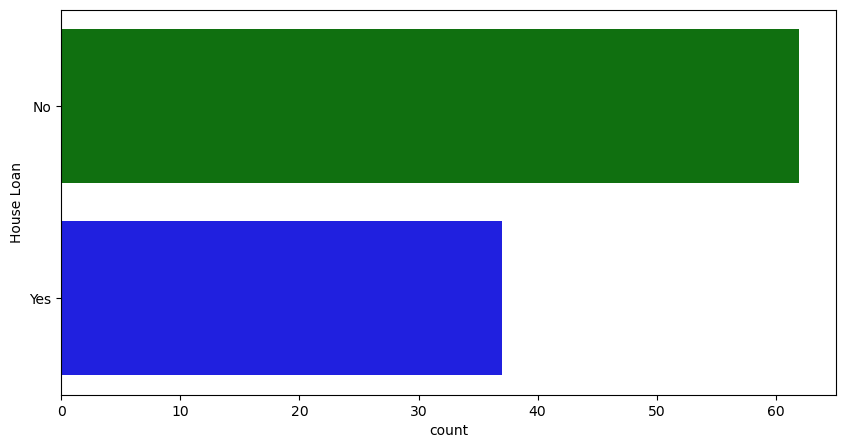

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(y="House Loan", data=data, palette={'No': 'green', 'Yes': 'blue'})
plt.show()

In [29]:
#From the above countplots and pie chart it is clear that there are more number of people with house loans as well as car loans.

In [30]:
data["Age"].agg(["min", "max"])

min    26
max    51
Name: Age, dtype: int64

In [31]:
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_above_46 = data.Age[(data.Age > 45)]

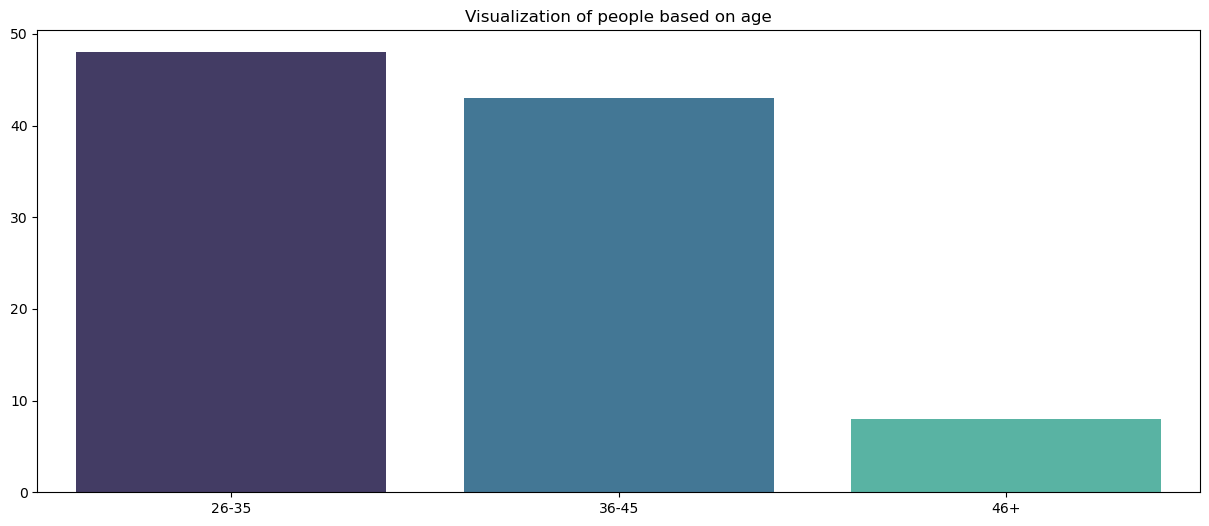

In [32]:
age_x = ["26-35", "36-45", "46+"]
age_y = [len(age_26_35.values), len(age_36_45.values), len(age_above_46.values)]
plt.figure(figsize = (15,6))
sns.barplot(x = age_x, y = age_y, palette = "mako")
plt.title("Visualization of people based on age")
plt.xlabel=("Age")
plt.ylabel=("Number of customers")
plt.show()

In [33]:
#There are more people in the age range of 26-35 and people of age 46 or more is quite less

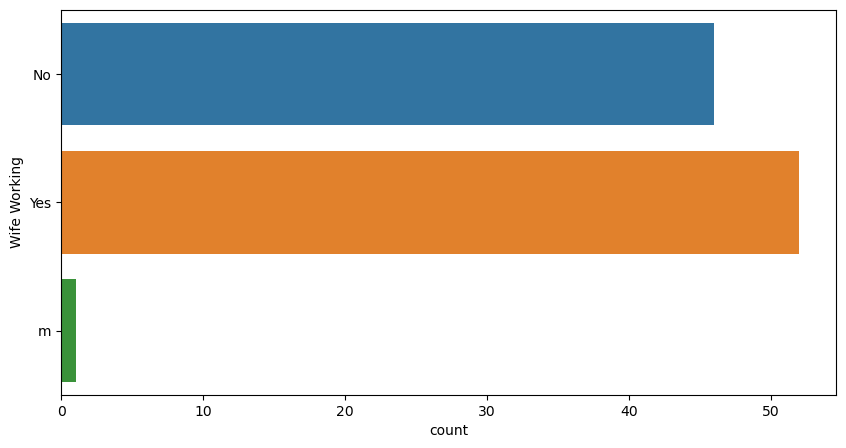

In [34]:
plt.figure(figsize=(10,5))
sns.countplot(y="Wife Working", data=data)
plt.show()

In [35]:
#From this object we can see that there is an undesirable entry called m which needs to be removed

In [36]:
data.loc[data["Wife Working"]=="m"]

,Age,Profession,Marital Status,Education,No of Dependents,Car_Loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Car_Price
11,35,Salaried,Married,Graduate,4,Yes,Yes,m,1400000,0,1400000,Baleno,700000


In [37]:
data=data.replace(to_replace="m", value="No")

In [38]:
row_11 = data.iloc[11]
print(row_11)

Age                       35
Profession          Salaried
Marital Status       Married
Education           Graduate
No of Dependents           4
Car_Loan                 Yes
House Loan               Yes
Wife Working              No
Salary               1400000
Wife Salary                0
Total Salary         1400000
Make                  Baleno
Car_Price             700000
Name: 11, dtype: object


In [39]:
#The letter m in the 11th row is replaced with No as the column wife salary is zer0.

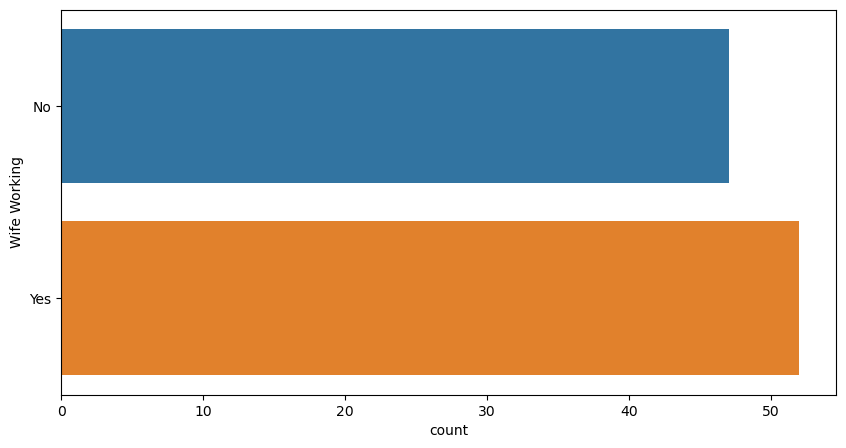

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(y="Wife Working", data=data)
plt.show()

In [41]:
#The number of working women are more than non-working women.

In [42]:
no_of_dependents = data["No of Dependents"].value_counts()
no_of_dependents

No of Dependents
3    34
2    29
0    22
4    14
Name: count, dtype: int64

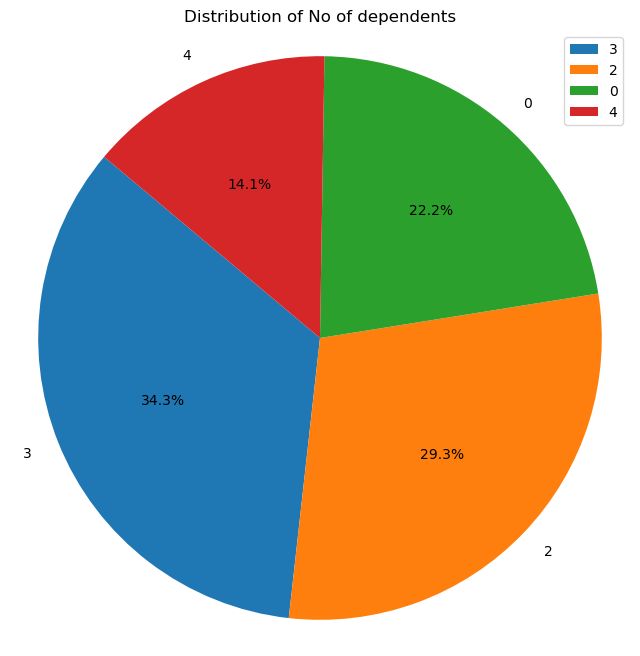

In [43]:
plt.figure(figsize=(8, 8))
plt.pie(no_of_dependents, labels = no_of_dependents.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of No of dependents')
plt.legend(loc='upper right')
plt.axis('equal')
plt.show()

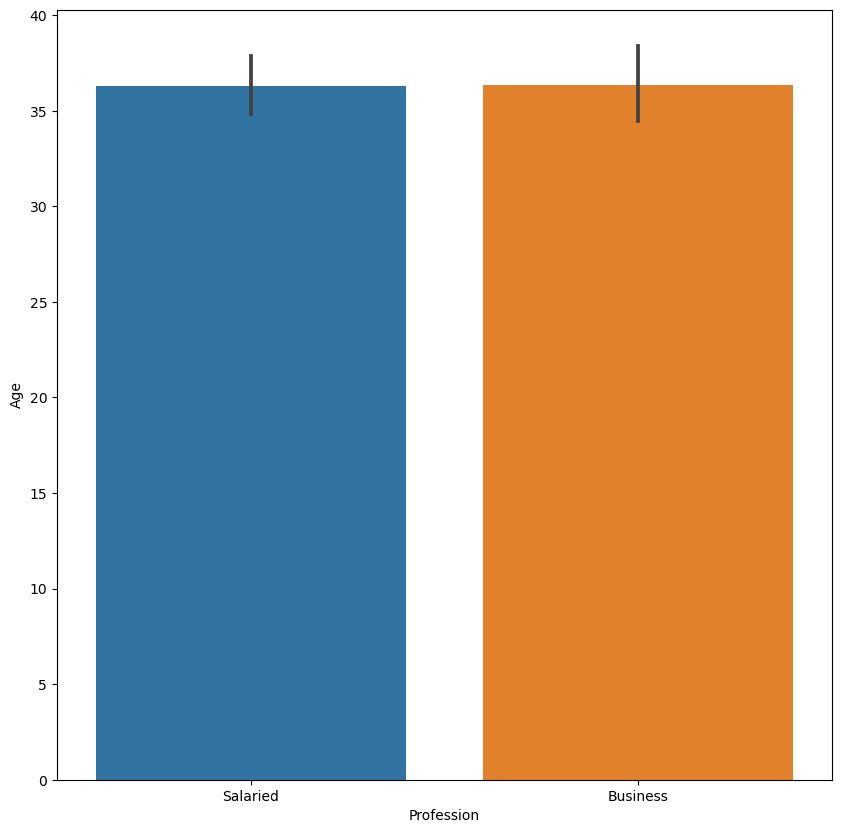

In [44]:
plt.figure(figsize=(10, 10))
sns.barplot(x='Profession', y='Age', data=data)
plt.show()

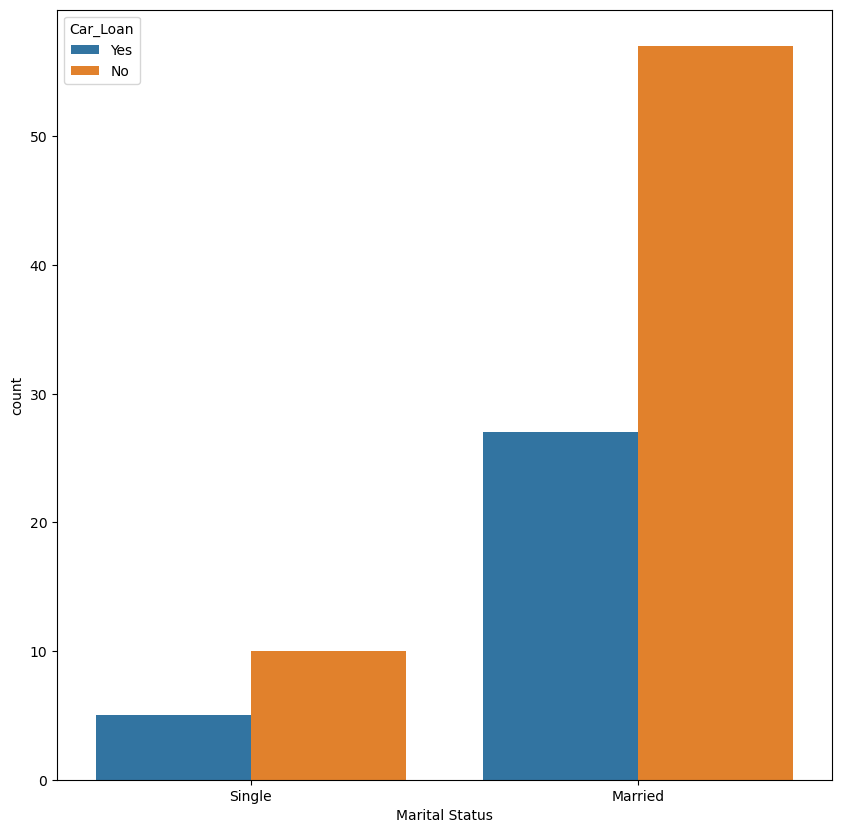

In [45]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Marital Status', hue='Car_Loan', data=data)
plt.show()

In [46]:
#The percentage of people not opting for loan is more in both the categories. But the percentage of married people looking for loans is higher than unmarried people.

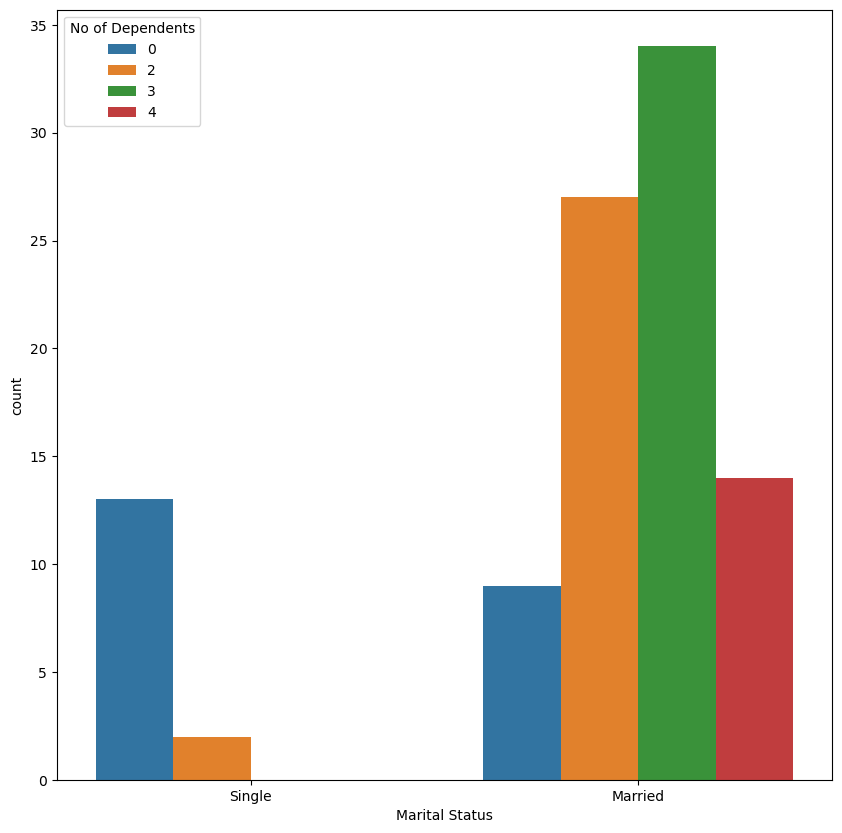

In [47]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Marital Status', hue='No of Dependents', data=data)
plt.show()

In [48]:
#Married people having more no of dependents compared to singles.

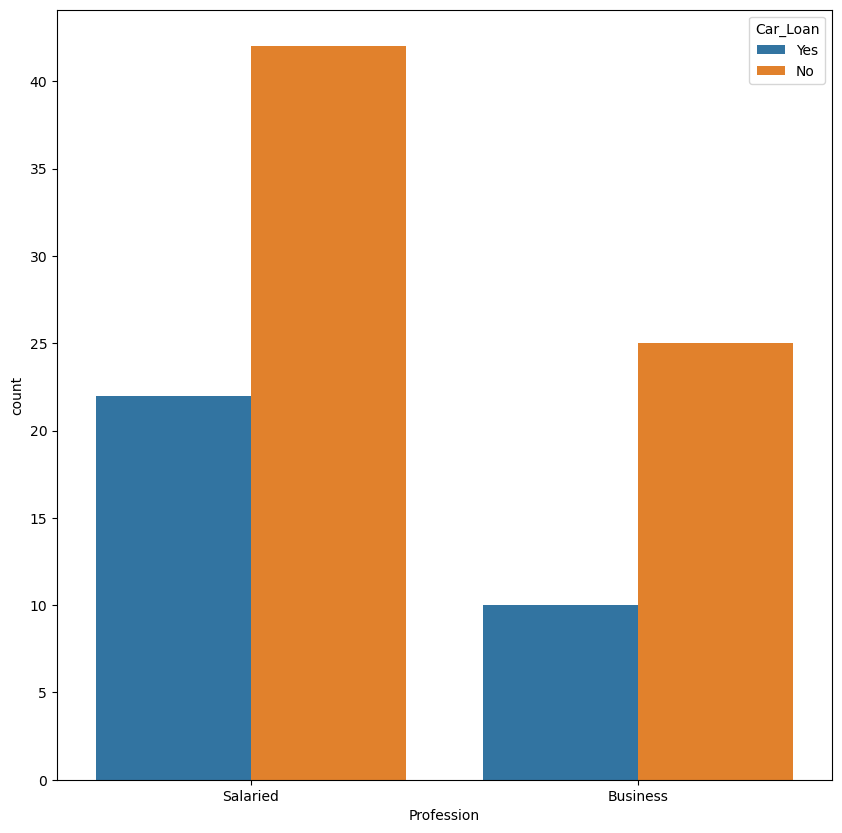

In [49]:
plt.figure(figsize=(10, 10))
sns.countplot(x='Profession', hue='Car_Loan', data=data)
plt.show()

In [50]:
#But the percentage of salaried people looking for loans is higher than businessman.

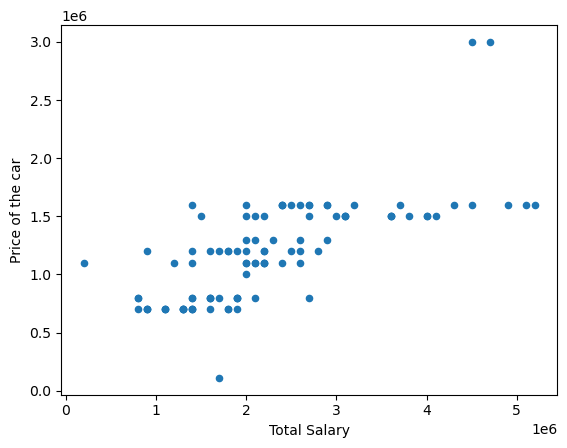

In [51]:
scatter_plot = data.plot(kind='scatter', x='Total Salary', y='Car_Price')
scatter_plot.set_xlabel('Total Salary')
scatter_plot.set_ylabel('Price of the car')
plt.show()

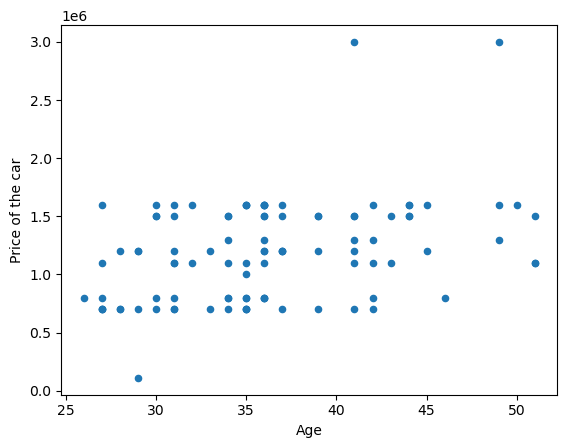

In [52]:
scatter_plot = data.plot(kind='scatter', x='Age', y='Car_Price')
scatter_plot.set_xlabel('Age')
scatter_plot.set_ylabel('Price of the car')
plt.show()

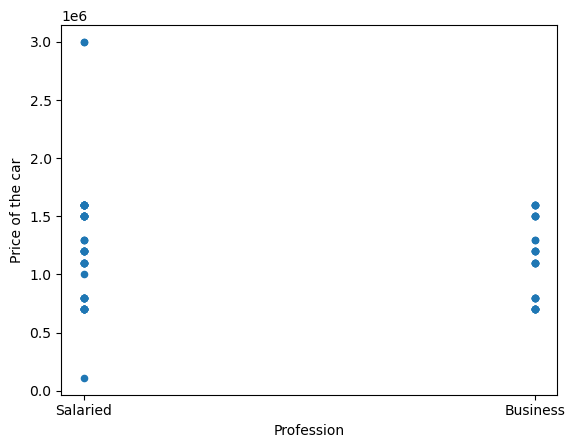

In [53]:
scatter_plot = data.plot(kind='scatter', x='Profession', y='Car_Price')
scatter_plot.set_xlabel('Profession')
scatter_plot.set_ylabel('Price of the car')
plt.show()

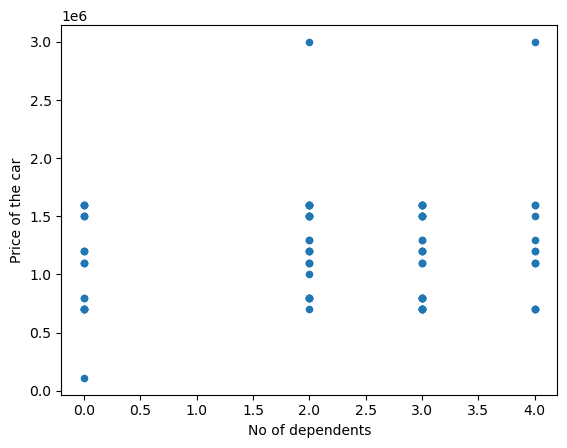

In [54]:
scatter_plot = data.plot(kind='scatter', x='No of Dependents', y='Car_Price')
scatter_plot.set_xlabel('No of dependents')
scatter_plot.set_ylabel('Price of the car')
plt.show()

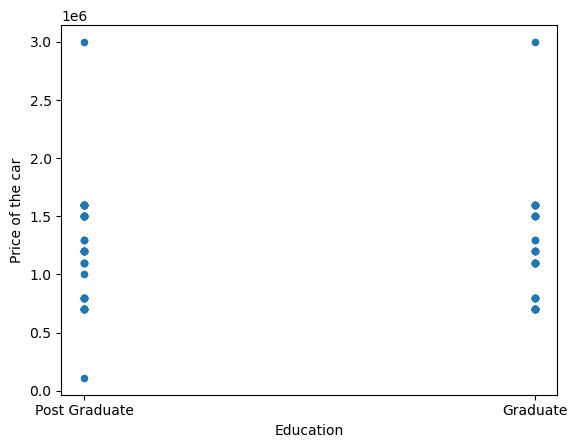

In [55]:
scatter_plot = data.plot(kind='scatter', x='Education', y='Car_Price')
scatter_plot.set_xlabel('Education')
scatter_plot.set_ylabel('Price of the car')
plt.show()

C:\Users\vijay\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


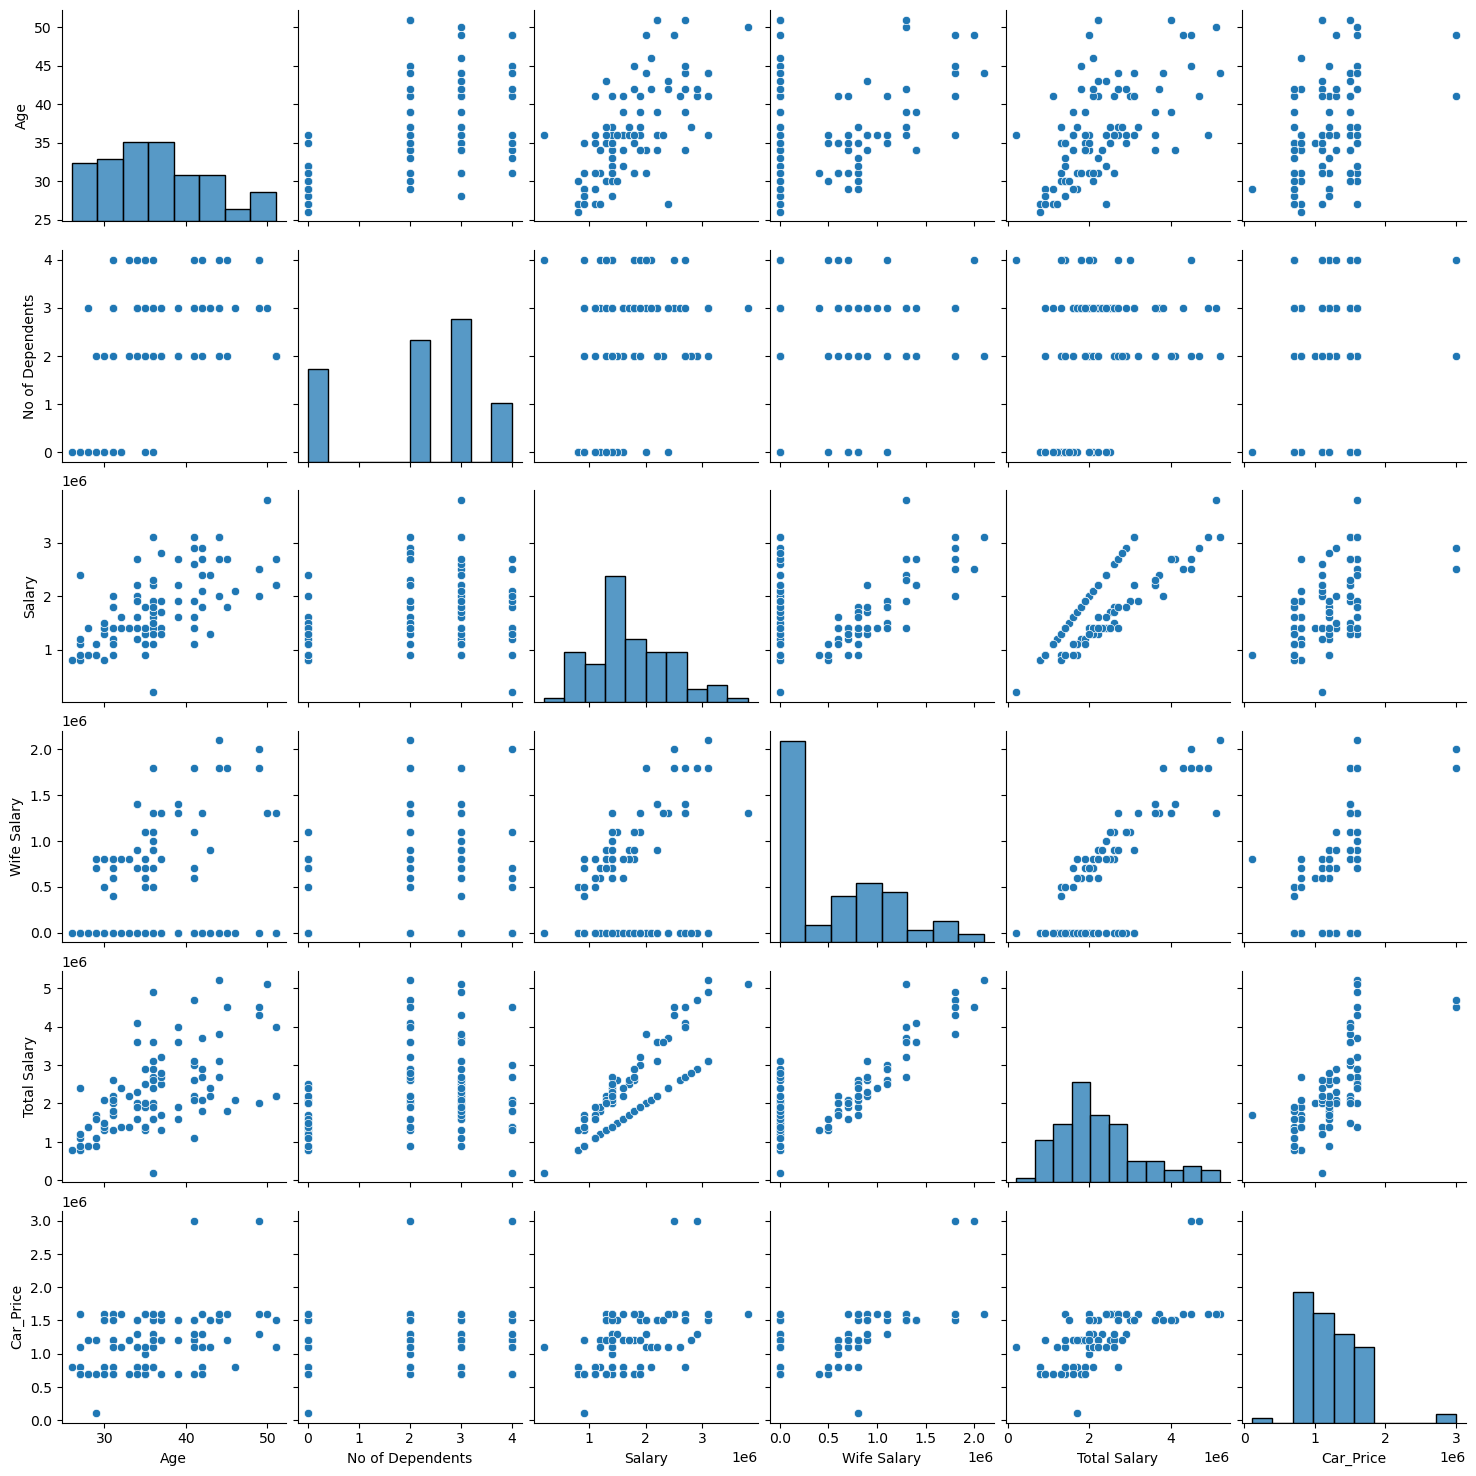

In [56]:
sns.pairplot(data)

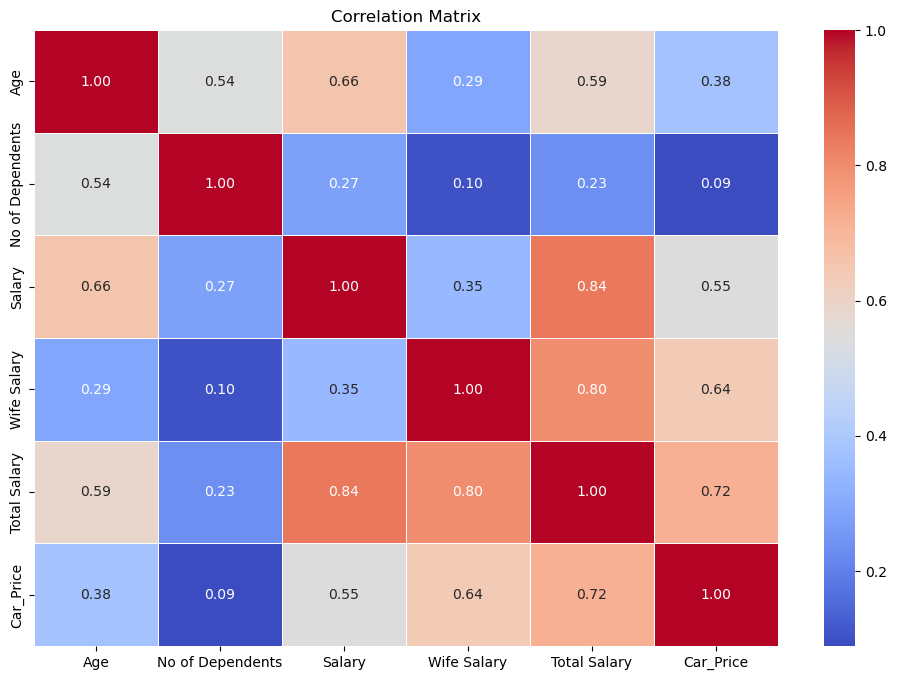

In [57]:
numerical_cols = ['Age', 'No of Dependents', 'Salary', 'Wife Salary', 'Total Salary', 'Car_Price']
correlation_data = data[numerical_cols]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

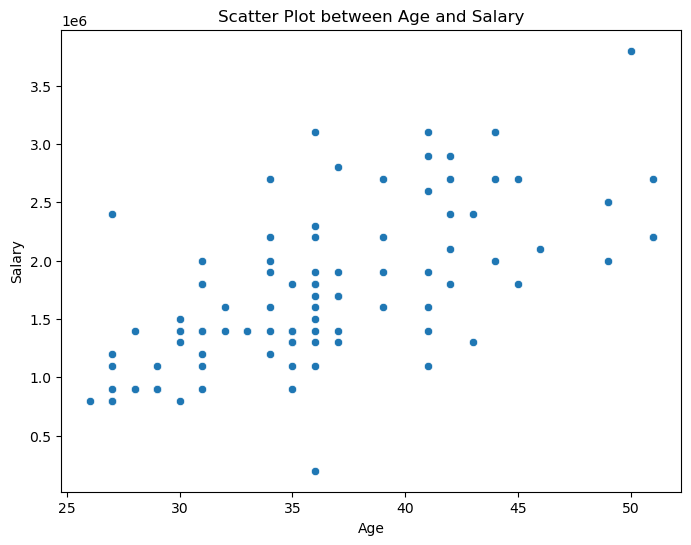

In [58]:
numerical_pairs = [('Age', 'Salary')]
for pair in numerical_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=pair[0], y=pair[1], data=data)
    plt.title(f'Scatter Plot between {pair[0]} and {pair[1]}')
    plt.show()

In [75]:
#https://github.com/monalisaburma-78/Feynn-Labs/blob/main/task3/EV%20Market%20Segmentation.pdf
#https://github.com/Sawparnika-CH/FEYNN-LABS-Internship/blob/main/Sawparnika_ch_project%203.pdf

In [ ]:
#import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA